# Problem Statement

**A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue.<br>In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people,
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.**

**This time we are implementing Principal Component Analysis(PCA) in the dataset.**
- For increasing model performance in terms of computational speed and accuracy (We can expect equal accuracy as equal to a linear Regression model or the accuracy may increase as in PCA we will loose only trivial amount of data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### importing sklearn library

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##### importing Principal Component Analysis

In [3]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Reading data

In [5]:
raw_data = pd.read_csv("day.csv")

In [6]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",raw_data.shape[0])
#pd.set_option("display.float_format", lambda x : "%.3f" %x)

In [7]:
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
raw_data.shape

(730, 16)

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


-  we have **no null values** to deal with.
- Variables $"season", "mth", "weathersit"$ are in int datatype we have to convert it accordingly for further analysis.

In [10]:
# Cross checking the null values
raw_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Checking for duplicate records

raw_data.duplicated().sum()

0

In [12]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- variables like $"temp", "atemp", "hum", "windspeed", "registered", "cnt"$ have the very similar mean and meadian values, which also indicates that these variables are not skewed much. and the outliers are trival in these variables. 

## Data Understanding

In [13]:
num_vars = ["temp","atemp","hum","windspeed","casual","registered","cnt"]

In [14]:
corr =  raw_data[num_vars].corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


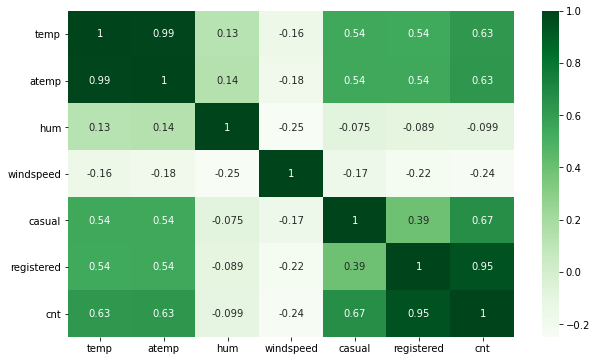

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(corr,cmap = "Greens",annot = True)
plt.show()

- variable "registered" is highly correlated with the target variable $"cnt"$ 
- The variables $"casual", "atemp" and "temp"$ are almost equally correlated with target variable $"cnt"$

-  We can observe a tremndous correlation value of 0.99 between variables $"temp" and "atemp"$, So definitely this is a clear sign of **Multicollinearity**

**Checking for linear relation among highly correlated variables**

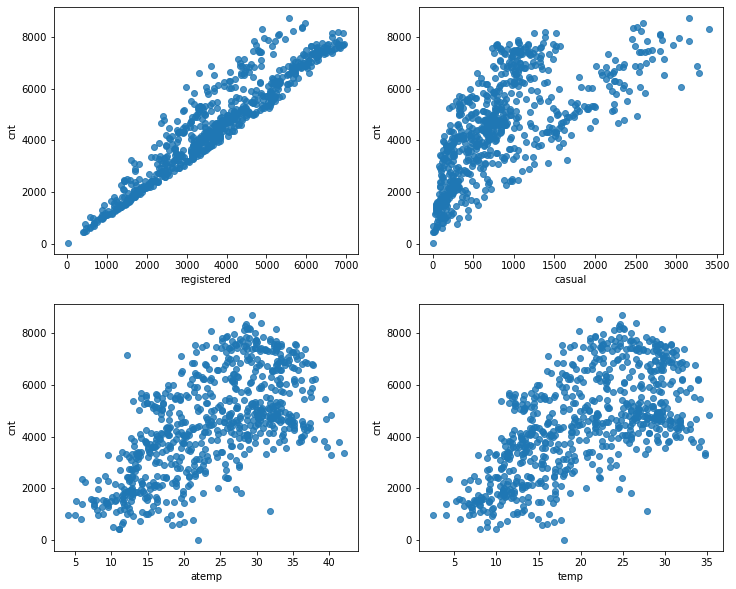

In [16]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.regplot(raw_data["registered"], raw_data["cnt"], fit_reg = False)


plt.subplot(2,2,2)
sns.regplot(raw_data["casual"], raw_data["cnt"], fit_reg = False)

plt.subplot(2,2,3)
sns.regplot(raw_data["atemp"], raw_data["cnt"], fit_reg = False)

plt.subplot(2,2,4)
sns.regplot(raw_data["temp"], raw_data["cnt"], fit_reg = False)

plt.show()

-  This clearly shows these variables have a positive trend and undergo a linear correlation with target variable.
-  Thus confirms as the potential variable for the model building.

### Checking for any sign of relationship between categorical variables and target variable "cnt" 

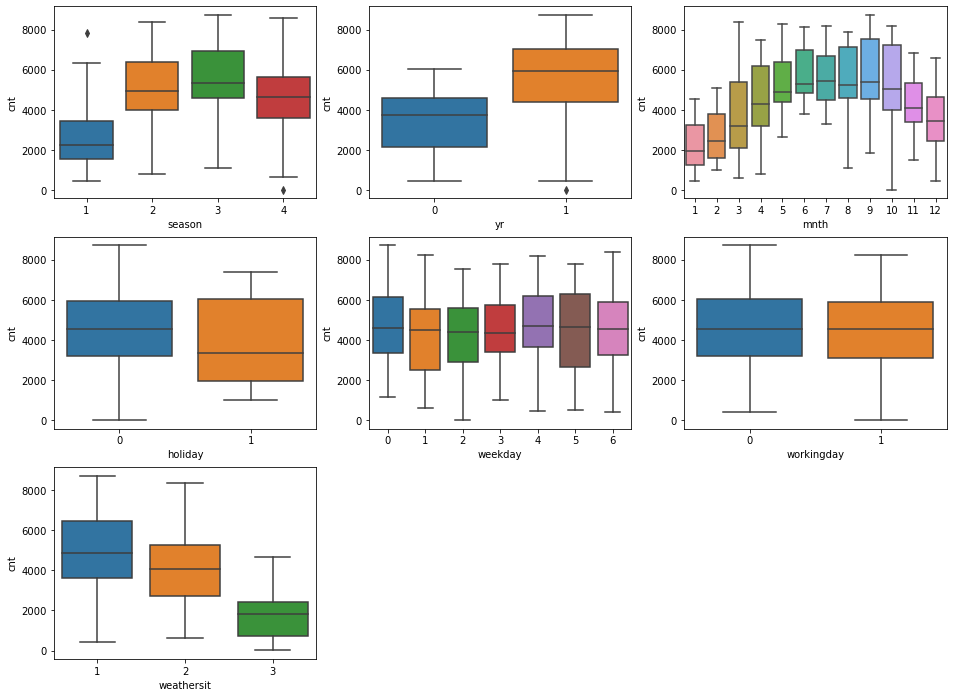

In [17]:
plt.figure(figsize = [16,12])

plt.subplot(3,3,1)
sns.boxplot(x = "season", y = "cnt", data = raw_data)

plt.subplot(3,3,2)
sns.boxplot(x = "yr", y = "cnt", data = raw_data)

plt.subplot(3,3,3)
sns.boxplot(x = "mnth", y = "cnt", data = raw_data)

plt.subplot(3,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = raw_data)

plt.subplot(3,3,5)
sns.boxplot(x = "weekday", y = "cnt", data = raw_data)

plt.subplot(3,3,6)
sns.boxplot(x = "workingday", y = "cnt", data = raw_data)

plt.subplot(3,3,7)
sns.boxplot(x = "weathersit", y = "cnt", data = raw_data)

plt.show()

-  Except $"weekday" and "workingday"$ everyother category has noticible influence over the target variable.

## Data preparation

##### variable "instant"

In [18]:
raw_data.instant.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

-  **It is clear that the variale instance is just a serial number for the records and doesn't have any analytical purpose in this model building, So we can drop $"instance"$ variable.**

In [19]:
raw_data.drop(["instant"],axis = 1,inplace = True)

##### variable "dteday"

- This variable is indicating the date of the data, As we have a seperate variable $"yr"$ which is indicating the year as 2018 or 2019, and a seperate variable $"mnth"$ which is indicating the month for the data and a seperate variable $"season"$ which is indicating the season of the data we can definitely drop the variable $"dteday"$.

In [20]:
raw_data = raw_data.drop(["dteday"], axis = 1)

##### variable "atemp"

-  As variable $"temp" and "atemp"$ are highly correlated with eachother any one among them becomes a redundant variable in terms  of model building.
- But as we are implementing PCA it automatically deals with collinearity and gives us final features which are not correleated to eachother. So we can keep these variables in the dataset.

##### variable "season"

In [21]:
raw_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

-  As per the data dictionary each of these numbers represents a specific season of the year, So for better analysis purpose we have to convert this variable into categorical variable and later we can create dummy variables according to their respective character levels.

In [22]:
raw_data["season"] = raw_data["season"].map({1 : "spring", 2 : "summer", 3 : "fall", 4 : "winter"})

In [23]:
# cross checking the variable that we have mapped.

raw_data["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [24]:
raw_data["season"].dtype

dtype('O')

##### variable "yr"

In [25]:
raw_data["yr"].value_counts()

1    365
0    365
Name: yr, dtype: int64

-  Here the year **2018 & 2019** have be **encoded as 1 and 0** it is adviseable to convert it to seperate categories, for building better model

In [26]:
raw_data["yr"] = raw_data["yr"].map({1 : "2019", 0 : "2018"})

In [27]:
# cross checking the variable that we have mapped.

raw_data["yr"].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

##### variable "mnth"

In [28]:
raw_data["mnth"].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

-  According to the data dictionary these numbers represent the months of the year, so building model by keeping, these as integers will add no meaning to the data so we are converting these to categorical variables with categories as their respective months.<br><br>
- later we can create dummy variables for these categories.

In [29]:
 months_dict = {1 : "jan", 2 : "feb", 3 : "mar", 4 : "apr", 5 : "may", 6 : "jun", 
                7 : "jul", 8 : "aug", 9 : "sep", 10 : "oct", 11 : "nov", 12 : "dec"}  

In [30]:
raw_data["mnth"] = raw_data["mnth"].map(months_dict)

In [31]:
# cross checking the variable that we have mapped.

raw_data["mnth"].value_counts()

oct    62
may    62
jan    62
mar    62
aug    62
jul    62
dec    62
apr    60
nov    60
sep    60
jun    60
feb    56
Name: mnth, dtype: int64

In [32]:
raw_data["mnth"].dtype

dtype('O')

##### variable "holiday"

In [33]:
raw_data["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

-  It is perfect for analysis

##### variable "weekday"

In [34]:
raw_data["weekday"].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

-  As mentioned in the data dictionary variable $"weekday"$ is representing the days of the week so keeping them as integers adds no value in terms of model building. So converting them to categorical variables.


In [35]:
 week_dict = {0 : "Sun", 1 : "Mon", 2 : "Tue", 3 : "Wed", 4 : "Thr", 5 : "Fri", 6 : "Sat"}

In [36]:
raw_data["weekday"] = raw_data["weekday"].map(week_dict)

In [37]:
# cross checking the data type of the variable "weekend", It has been perfectly changed to object data type.

raw_data["weekday"].dtype

dtype('O')

##### variable "workingday"

In [38]:
raw_data["workingday"].value_counts()

1    504
0    226
Name: workingday, dtype: int64

-  It is perfect for analysis

##### variable "weathersit"

In [39]:
raw_data["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- As per the data dictionary they have grouped certain weather conditions together and **encoded as 1,2,3 so lets convert this variable to a categorical variable** for the purpose of model building.

In [40]:
raw_data["weathersit"] = raw_data["weathersit"].astype("object")

In [41]:
# cross checking the data type of the variable "weathersit", It has been perfectly changed to object data type.

raw_data["weathersit"].dtype

dtype('O')

##### variable "casual" & "registered"

-  As our target variable is just the count of these two variables, **Keeping these variables for model building will explain all the variance** in the target variable and which is not reliable.
-  And our business problem wants to find the driving variables to boost their business after the lift of lockdown we have to focus more on driving variables.
-  We are droping both $"casual" and "registered"$ variables.

In [42]:
raw_data.drop(["casual", "registered"], axis = 1, inplace = True)

In [43]:
raw_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,Thr,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


### creating dummy variables for categorical variables

In [44]:
cat_var = raw_data.select_dtypes(exclude = ["int64", "float64"])
cat_var.columns

Index(['season', 'yr', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [45]:
dum_df = pd.get_dummies(raw_data[cat_var.columns], drop_first = True)

In [46]:
dum_df.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
dum_df.shape

(730, 23)

-  So we have 23 dummy variables now

##### concating the dum_df & raw_data and droping the categorical variables

In [48]:
bike_data = pd.concat([raw_data, dum_df], axis = 1)

In [49]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
0,spring,2018,jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,2018,jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,2018,jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,2018,jan,0,Thr,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,2018,jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
bike_data.shape

(730, 35)

In [51]:
bike_data.drop(cat_var.columns, axis = 1, inplace = True)

In [52]:
bike_data.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
bike_data.shape

(730, 30)

-  Totally we have 30 columns.

## Now the Data is ready for model building

### Creating train and test data

In [54]:
X = bike_data.drop("cnt", axis = 1)
y = bike_data["cnt"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.3, random_state = 100)

In [56]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(511, 29) (511,)
(219, 29) (219,)


## Scaling the variables

-  **As the Pricipal Component Analysis finds the principal components based on the variance of each features, Features in a high scale may end up dominating the variance simply because it is not scaled**
-  **So the best way is to scale the variables to a common standardized scale.**

In [57]:
scaler = StandardScaler()

In [58]:
num_var_scale = ["temp", "hum", "windspeed", "atemp"]

In [59]:
X_train[num_var_scale] = scaler.fit_transform(X_train[num_var_scale])

In [60]:
# Cross checking the scaled variables

X_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
count,511.000000,511.000000,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.025440,0.712329,-6.680892e-17,2.198720e-16,-2.861377e-16,-1.067313e-16,0.242661,0.246575,0.248532,0.508806,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.344423,0.029354
std,0.157613,0.453121,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,0.429112,0.431440,0.432585,0.500412,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.475645,0.168963
min,0.000000,0.000000,-2.383944e+00,-2.420505e+00,-4.466622e+00,-1.893185e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.705342e-01,-8.501297e-01,-7.656381e-01,-7.179018e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.081170e-02,7.625995e-02,2.174636e-02,-1.342167e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,8.776067e-01,8.270210e-01,7.147584e-01,5.522631e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,2.052245e+00,2.296606e+00,2.401583e+00,4.007457e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-  The description of the data shows that values of all the numerical variables have been **perfectly scaled with a mean 0 and standard deviation 1.**

In [61]:
y_train = (y_train - y_train.mean())/y_train.std()

In [62]:
y_train.describe()

count    5.110000e+02
mean    -6.083414e-17
std      1.000000e+00
min     -2.287945e+00
25%     -7.004677e-01
50%      2.441709e-02
75%      7.766898e-01
max      2.161701e+00
Name: cnt, dtype: float64

-  The description of the data shows that values of the "cnt" variables have been **perfectly scaled with a mean 0 and standard deviation 1.**

## Finding  the Principal Components to represent the data in new basis using PCA

In [63]:
pca = PCA(random_state = 5)

In [64]:
pca_df = pca.fit_transform(X_train, y_train)

In [65]:
pca.explained_variance_ratio_

array([3.33274224e-01, 1.74493889e-01, 1.12938761e-01, 4.92868487e-02,
       4.40232160e-02, 3.61332572e-02, 3.47200724e-02, 2.26666016e-02,
       2.17464271e-02, 2.12750841e-02, 2.02486512e-02, 1.92911595e-02,
       1.36389098e-02, 1.30944048e-02, 1.24769771e-02, 1.21174795e-02,
       1.13933397e-02, 1.09154025e-02, 1.06061057e-02, 7.43280923e-03,
       5.21692142e-03, 3.19601913e-03, 3.02552960e-03, 2.57741837e-03,
       1.89056607e-03, 1.14375472e-03, 7.08963031e-04, 3.46076343e-04,
       1.21132293e-04])

In [66]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.33327422, 0.50776811, 0.62070687, 0.66999372, 0.71401694,
       0.75015019, 0.78487027, 0.80753687, 0.8292833 , 0.85055838,
       0.87080703, 0.89009819, 0.9037371 , 0.91683151, 0.92930848,
       0.94142596, 0.9528193 , 0.9637347 , 0.97434081, 0.98177362,
       0.98699054, 0.99018656, 0.99321209, 0.99578951, 0.99768007,
       0.99882383, 0.99953279, 0.99987887, 1.        ])

Results are very surprising, seems the **PCA has brilliantly found the best principal components** to represent the data, and we **can reduce the dimentions significantly as the variables required to represent 95% of the data are less when compared to the original dataset.**

#### viewing the results of PCA in a graph

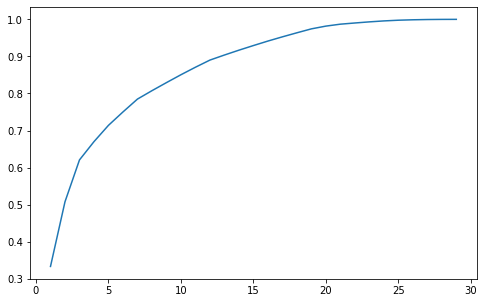

In [67]:
plt.figure(figsize = (8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.show()

- It is evident that we only need 17 variables to represent about 95% of the data it is a significant reduction in dimentionality of the data(form 30 to 17)

##### Automatically choosing the required number of  Principal Components to represent our final data

In [68]:
final_pca = PCA(n_components = 0.95)

X_train_pca = final_pca.fit_transform(X_train, y_train)

In [69]:
# Checking our final data set

X_train_pca.shape

(511, 17)

Now that the data is perfectly ready for the model building process

##### Checking the multicollinearity of the features

In [70]:
correlation = np.corrcoef(X_train_pca.transpose())

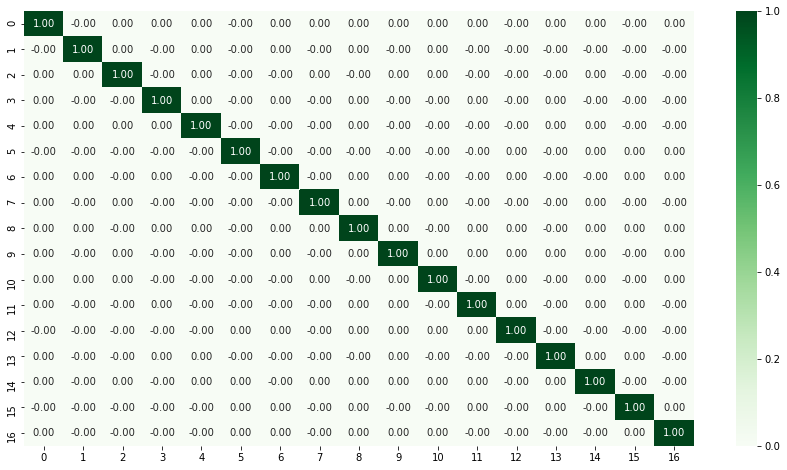

In [71]:
plt.figure(figsize = (15,8))
sns.heatmap(correlation, cmap = "Greens", annot = True, fmt = ".2f")
plt.show()

- **Literally we can't notice serious multicollinearity going on between any of these inpenendent features, As Expected PCA handles Multicollinearity easily by choosing the Principal Components perpendicular to eachother.**

## Model Building

In [72]:
lm = LinearRegression()

In [73]:
# Initial training of the model with all the features.

lm.fit(X_train_pca, y_train)

LinearRegression()

In [74]:
lm.coef_

array([-0.41849737,  0.2004751 , -0.23615506, -0.09174764,  0.2893007 ,
        0.89437939,  0.56608558,  0.00949209,  0.11898247,  0.09509583,
       -0.0853659 , -0.03045826,  0.0964692 ,  0.03630174,  0.0340873 ,
        0.05043701, -0.3126195 ])

In [75]:
lm.intercept_

-8.428005294154866e-17

-  **So the model has learnt the coefficients as well as the intercept for all the variables.**

## Linear model assumption checking 
-  **Checking normally distributed residuals.**

In [76]:
y_train_pred = lm.predict(X_train_pca)

In [77]:
res = y_train - y_train_pred

In [78]:
round(res.mean(),5)

-0.0

-  Its very close to zero, indicating the mean is zero

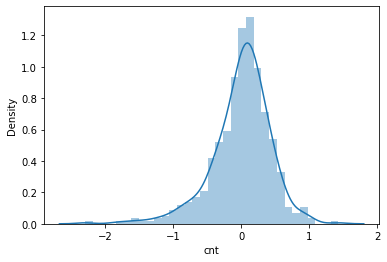

In [79]:
sns.distplot(res)
plt.show()

the model shows very good picture of the **normally distributed residuals with mean 0 and standard deviation sigma.**
- which is a clear sign that the values predicted are as accurate as possible.

##### Checking for Homoscedasticity

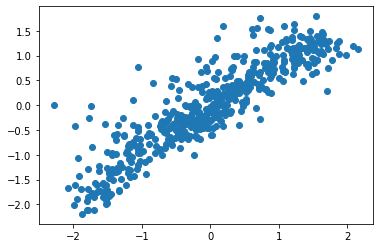

In [80]:
plt.scatter(y_train, y_train_pred)
plt.show()

the model shows **almost a constant variance of the residual terms.**

## Testing the model in the test set (Unseen data)

#### Scaling the test data set

In [81]:
X_test[num_var_scale] = scaler.transform(X_test[num_var_scale])

In [82]:
X_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,0.095623,0.093675,-0.081220,-0.044220,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.188034,0.481313,1.036729,1.027802,1.023183,0.943792,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,-2.177256,-2.298095,-2.667735,-2.145780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.810650,-0.794276,-0.845257,-0.721809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.094513,0.170122,-0.155193,-0.126187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.983551,0.948137,0.642829,0.485057,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.983149,2.206669,2.416326,2.871432,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Converting the test data to the basis which was found by the PCA

In [83]:
X_test_pca = final_pca.transform(X_test)

In [84]:
# Crossing the X_test whether it got transformed correctly

X_test_pca.shape

(219, 17)

In [85]:
y_test = (y_test - y_test.mean())/y_test.std()
y_test.describe()

count    2.190000e+02
mean    -1.389046e-16
std      1.000000e+00
min     -2.162598e+00
25%     -6.549351e-01
50%      1.686385e-02
75%      6.965632e-01
max      2.026730e+00
Name: cnt, dtype: float64

-  The description of the data shows that values of y_test have been **perfectly scaled with a mean 0 and standard deviation 1.**

### predicting y_test values

In [86]:
y_test_pred = lm.predict(X_test_pca)

In [87]:
test_result = y_test - y_test_pred
test_result.head()

184    0.769600
535   -1.050843
299   -0.464569
221   -0.312558
152   -0.350121
Name: cnt, dtype: float64

## Model validation

**R2 value of train data**

In [88]:
train_R2 = r2_score(y_true = y_train, y_pred = y_train_pred)
print("train_R2 value =",round(train_R2,3))

train_R2 value = 0.81


the **train r2_score** when the model was trained in the original dataset without PCA was **0.84**

**R2 value of test data**

In [89]:
test_R2 = r2_score(y_true = y_test, y_pred = y_test_pred)
print("test_R2 value =",round(test_R2,3))

test_R2 value = 0.804


Surprisingly the **test r2_score** when the model was trained in the original dataset without PCA was also **0.804**

**adhjusted R2 value of train data**

In [90]:
# N -> number of rows in the dataset
N = X_train_pca.shape[0]

# p -> number of columns in the dataset
p = X_train_pca.shape[1]

# formula for adjusted R2

adjusted_train_R2 = 1 - ((1-train_R2)*(N-1)/(N-p-1))
print("adjusted_train_R2 value =",round(adjusted_train_R2,3))

adjusted_train_R2 value = 0.804


the **train Adjusted_r2 score** when the model was trained in the original dataset without PCA was **0.836**

**adjusted R2 value of test data**

In [91]:
# N -> number of rows in the dataset
N = X_test_pca.shape[0]

# p -> number of columns in the dataset
p = X_test_pca.shape[1]

# formula for adjusted R2

adjusted_test_R2 = 1 - ((1-test_R2)*(N-1)/(N-p-1))
print("adjusted_test_R2 value =",round(adjusted_test_R2,3))

adjusted_test_R2 value = 0.787


the **test Adjusted_r2 score** when the model was trained in the original dataset without PCA was **0.793**

**The model generalizes the unseen test data very well**

##### Benefits of applying PCA to the dataset
- The Model was build in a very hassel free process, we didnt worried about the multicollinearity of the features which can affect the stability of the model over time.
- We didn't worried about the reccursive feature elimination after checking the insignificance of the varibale (using p-value) and Multicollinearity (using VIF)
- We developed a model which is as good as a well trained Linear Regression Model in predicting the unseen data with significantly less variables.